# Laboratorio FLC

In [210]:
import numpy as np
import skfuzzy as fuzz
import fuzzylite as fl
from skfuzzy import control as ctrl

In [211]:
engine = fl.Engine(
    "TipCalculator",
    input_variables=[
        fl.InputVariable(
            "service",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            terms=[
                fl.Trapezoid("poor", 0.0, 0.0, 2.5, 5.0),
                fl.Triangle("good", 2.5, 5.0, 7.5),
                fl.Trapezoid("excellent", 5.0, 7.5, 10.0, 10.0)
            ]
        ),
        fl.InputVariable(
            "food",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            terms=[
                fl.Trapezoid("rancid", 0.0, 0.0, 1.0, 3.0),
                fl.Trapezoid("delicious", 7.0, 9.0, 10.0, 10.0)
            ]
        )
    ],
    output_variables=[
        fl.OutputVariable(
            "tip",
            minimum=0.0,
            maximum=30.0,
            lock_range=False,
            default_value=fl.nan,
            aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(resolution=100),
            terms=[
                fl.Triangle("cheap", 0.0, 5.0, 10.0),
                fl.Triangle("average", 10.0, 15.0, 20.0),
                fl.Triangle("generous", 20.0, 25.0, 30.0)
            ]
        )
    ],
    rule_blocks=[
        fl.RuleBlock(
            "mamdani",
            conjunction=fl.AlgebraicProduct(),
            disjunction=fl.AlgebraicSum(),
            implication=fl.AlgebraicProduct(),
            activation=fl.General(),
            rules=[
                fl.Rule.create("if service is poor or food is rancid then tip is cheap"),
                fl.Rule.create("if service is good then tip is average"),
                fl.Rule.create("if service is excellent or food is delicious then tip is generous")
            ]
        )
    ]
)

In [212]:
engine.input_variable("service").value = 2.0
engine.input_variable("food").value = 7.0
engine.process()

print(f"y = {engine.output_variable("tip").value}")
print(f"ŷ = {engine.output_variable("tip").fuzzy_value()}")

y = 4.998950209958008
ŷ = 1.000/cheap + 0.000/average + 0.000/generous


### Ejercicio 1

In [213]:
engine = fl.Engine(
    "TipCalculator",
    input_variables=[
        fl.InputVariable(
            "service",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            terms=[
                fl.Gaussian("poor", 0.000, 1.500),
                fl.Gaussian("good", 5.000, 1.500),
                fl.Gaussian("excellent", 10.000, 1.5000)
            ]
        ),
        fl.InputVariable(
            "food",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            terms=[
                fl.Trapezoid("rancid", 0.0, 0.0, 1.0, 3.0),
                fl.Trapezoid("delicious", 7.0, 9.0, 10.0, 10.0)
            ]
        )
    ],
    output_variables=[
        fl.OutputVariable(
            "tip",
            minimum=0.0,
            maximum=30.0,
            lock_range=False,
            default_value=fl.nan,
            aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(resolution=100),
            terms=[
                fl.Triangle("cheap", 0.0, 5.0, 10.0),
                fl.Triangle("average", 10.0, 15.0, 20.0),
                fl.Triangle("generous", 20.0, 25.0, 30.0)
            ]
        )
    ],
    rule_blocks=[
        fl.RuleBlock(
            "mamdani",
            conjunction=fl.AlgebraicProduct(),
            disjunction=fl.AlgebraicSum(),
            implication=fl.AlgebraicProduct(),
            activation=fl.General(),
            rules=[
                fl.Rule.create("if service is poor or food is rancid then tip is cheap"),
                fl.Rule.create("if service is good then tip is average"),
                fl.Rule.create("if service is excellent or food is delicious then tip is generous")
            ]
        )
    ]
)

In [214]:
engine.input_variable("service").value = 2.0
engine.input_variable("food").value = 7.0
engine.process()

print(f"y = {engine.output_variable("tip").value}")
print(f"ŷ = {engine.output_variable("tip").fuzzy_value()}")

y = 7.4747515564301255
ŷ = 0.411/cheap + 0.135/average + 0.000/generous


Los resultados obtenidos, en comparación con los del ejemplo anterior, muestran que la sugerencia de propina es menos severa, con una seguerencia del **7.47%** a diferencia del 4.99% del caso anterior.

Además, la distribución de la propina a dejar, ya no es completamente dominada por _cheap_, sino que ahora está con 0.41 en _cheap_ y 0.135 en _average_.

Esto lleva a la conclusión de que al usar gaussianas para la entrada de la calidad de comida, se suaviza la salida de la propina y, por lo tanto, distribuye los valores de propina en más de una categoría.

### Ejercicio 2

In [215]:
engine = fl.Engine(
    "TipCalculator",
    input_variables=[
        fl.InputVariable(
            "service",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            terms=[
                fl.Gaussian("poor", 0.000, 1.500),
                fl.Gaussian("good", 5.000, 1.500),
                fl.Gaussian("excellent", 10.000, 1.5000)
            ]
        ),
        fl.InputVariable(
            "food",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            terms=[
                fl.Trapezoid("rancid", 0.0, 0.0, 1.0, 3.0),
                fl.Trapezoid("delicious", 7.0, 9.0, 10.0, 10.0)
            ]
        )
    ],
    output_variables=[
        fl.OutputVariable(
            "tip",
            minimum=0.0,
            maximum=30.0,
            lock_range=False,
            default_value=fl.nan,
            aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(resolution=100),
            terms=[
                fl.Triangle("cheap", 0.0, 10.0, 15.0),
                fl.Triangle("average", 10.0, 15.0, 20.0),
                fl.Triangle("generous", 15.0, 20.0, 30.0)
            ]
        )
    ],
    rule_blocks=[
        fl.RuleBlock(
            "mamdani",
            conjunction=fl.AlgebraicProduct(),
            disjunction=fl.AlgebraicSum(),
            implication=fl.AlgebraicProduct(),
            activation=fl.General(),
            rules=[
                fl.Rule.create("if service is poor or food is rancid then tip is cheap"),
                fl.Rule.create("if service is good then tip is average"),
                fl.Rule.create("if service is excellent or food is delicious then tip is generous")
            ]
        )
    ]
)

In [216]:
engine.input_variable("service").value = 2.0
engine.input_variable("food").value = 7.0
engine.process()

print(f"y = {engine.output_variable("tip").value}")
print(f"ŷ = {engine.output_variable("tip").fuzzy_value()}")

y = 9.286783025231697
ŷ = 0.411/cheap + 0.135/average + 0.000/generous


La distribución del valor de la propina en las categorías de este conjunto difuso no se vio afectado, sin embargo, la sugerencia de propina se vió mejorada, pues ahora el valor aumentó a **9.28%**

### Ejercicio 3.1

In [217]:
service = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')
food = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')
tip = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

service.automf(3)
food.automf(3)

tip['low'] = fuzz.gaussmf(tip.universe, 0.000, 3.000)
tip['medium'] = fuzz.gaussmf(tip.universe, 12.5, 3.00)
tip['high'] = fuzz.gaussmf(tip.universe, 25.000, 3.00)

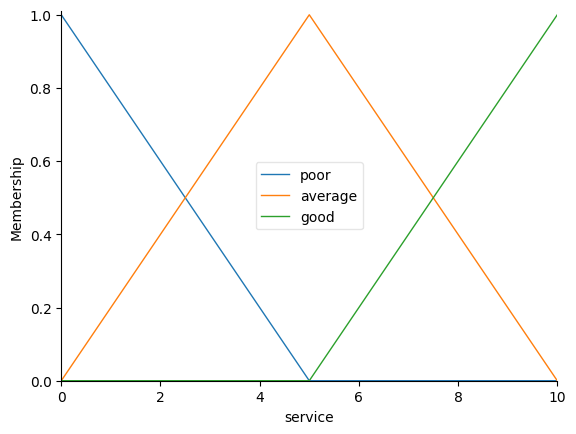

In [218]:
service.view();

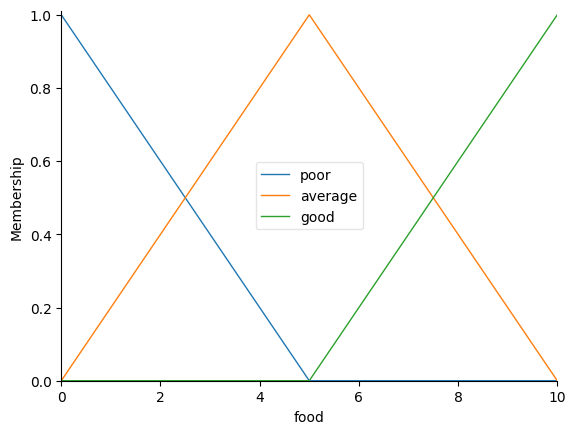

In [219]:
food.view();

In [220]:
rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['service'] = 2.0
tipping.input['food'] = 7.0

tipping.compute()

14.385510138488652


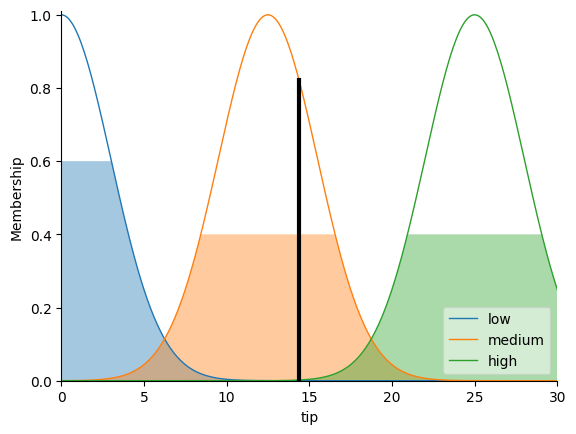

In [221]:
print(tipping.output['tip'])
tip.view(sim=tipping);

En este ejercicio, se resolvió el problema de la propina a partir de la metodología propuesta por el tutorial de **scikit-fuzzy**, donde se usa el método _automf_ para generar funciones de membresía triangulares tanto para la conjunto **service** y **food**, y con funciones gaussianas para el conjunto de salida.

Lo que se obtuvo es que la cantidad de propina sugerida es del **14.38%**, y la distribución de dicho valor en sus tres categorías es de $ŷ = 0.6/low + 0.4/medium + 0.4/high$

### Ejercicio 3.2

In [222]:
service = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')
food = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')
tip = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

service['poor'] = fuzz.gaussmf(service.universe, 0.000, 1.500)
service['good'] = fuzz.gaussmf(service.universe, 5.000, 1.500)
service['excellent'] = fuzz.gaussmf(service.universe, 10.000, 1.500)

food.automf(3)

tip['low'] = fuzz.gaussmf(tip.universe, 0.000, 3.000)
tip['medium'] = fuzz.gaussmf(tip.universe, 12.5, 3.00)
tip['high'] = fuzz.gaussmf(tip.universe, 25.000, 3.00)

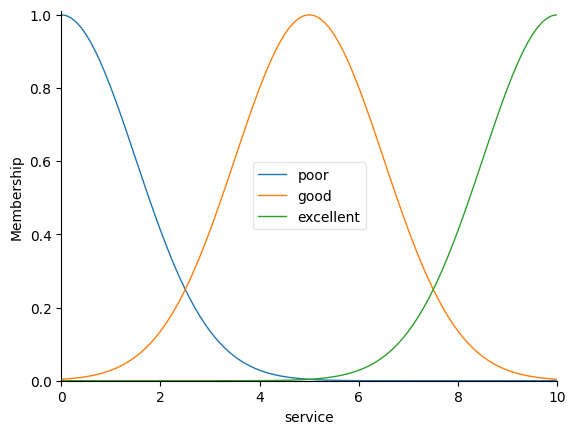

In [223]:
service.view();

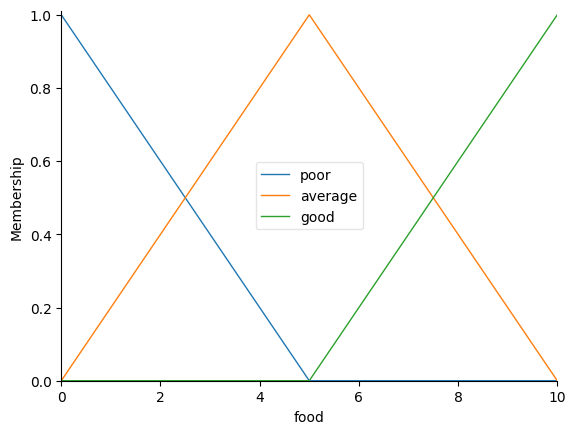

In [224]:
food.view();

In [225]:
rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
rule2 = ctrl.Rule(service['good'], tip['medium'])
rule3 = ctrl.Rule(service['excellent'] | food['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['service'] = 2.0
tipping.input['food'] = 7.0

tipping.compute()

16.05546441416077


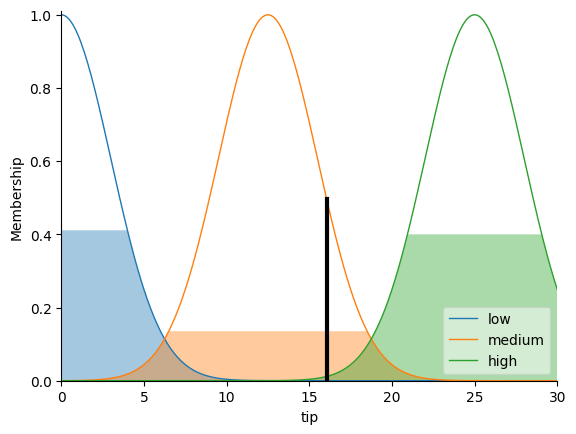

In [226]:
print(tipping.output['tip'])
tip.view(sim=tipping);

Sin embargo, también se propone esta solución para el ejercicio, donde se usan funciones de membresía gaussianas para el conjunto de **service**, tal como fue en los ejercicios anteriores.

Lo que se obtuvo es que la cantidad de propina sugerida es del **16.05%**, y la distribución de dicho valor en sus tres categorías es de $ŷ = 0.4/low + 0.1/medium + 0.4/high$.

Es decir, se puede ver una ligero aumento en la propina sugerida en comparación con la propuesta en el punto anterior.

### Ejercicio 4

In [227]:
left_sensor = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'left_sensor')
left_sensor['near'] = fuzz.trapmf(left_sensor.universe, [0, 0, 4, 6])
left_sensor['far'] = fuzz.trapmf(left_sensor.universe, [4, 6, 10, 10])

front_sensor = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'front_sensor')
front_sensor['near'] = fuzz.trapmf(front_sensor.universe, [0, 0, 4, 6])
front_sensor['far'] = fuzz.trapmf(front_sensor.universe, [4, 6, 10, 10])

right_sensor = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'right_sensor')
right_sensor['near'] = fuzz.trapmf(right_sensor.universe, [0, 0, 4, 6])
right_sensor['far'] = fuzz.trapmf(right_sensor.universe, [4, 6, 10, 10])

left_motor = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'left_motor')
left_motor["forward"] = fuzz.trapmf(left_motor.universe, [0, 0, 0.4, 0.6])
left_motor["reverse"] = fuzz.trapmf(left_motor.universe, [0.4, 0.6, 1, 1])

right_motor = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'right_motor')
right_motor["forward"] = fuzz.trapmf(right_motor.universe, [0, 0, 0.4, 0.6])
right_motor["reverse"] = fuzz.trapmf(right_motor.universe, [0.4, 0.6, 1, 1])

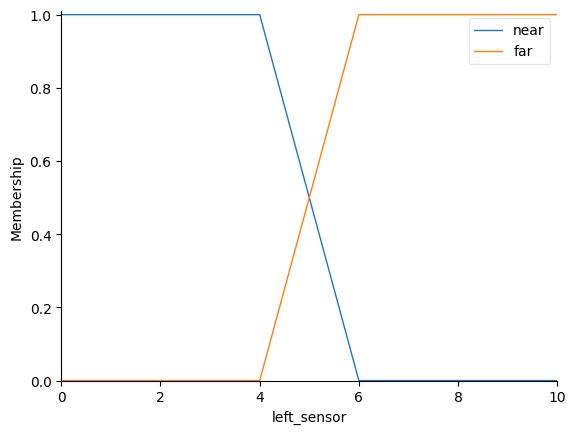

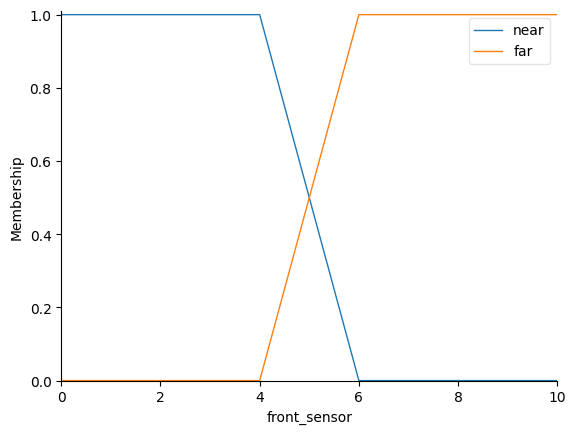

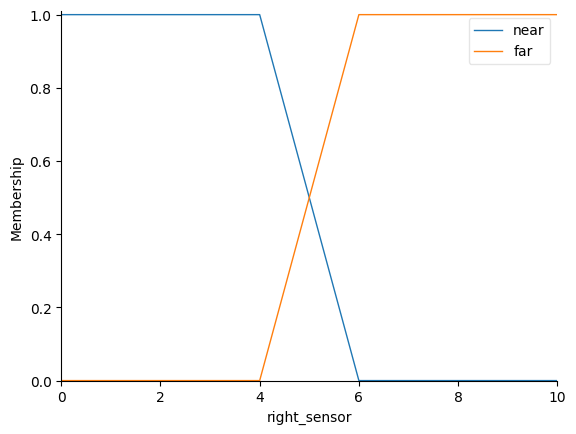

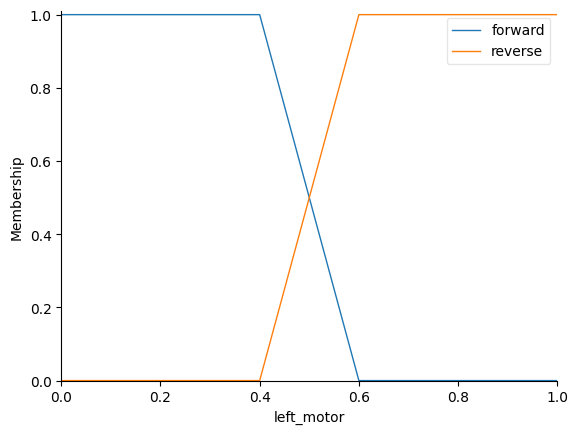

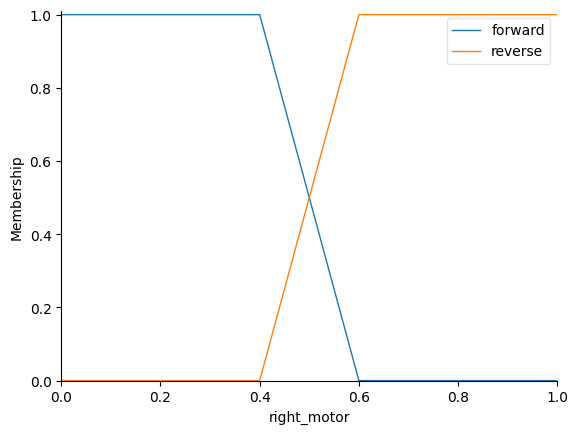

In [228]:
left_sensor.view();
front_sensor.view();
right_sensor.view();
left_motor.view();
right_motor.view();

In [229]:
rule1 = ctrl.Rule(left_sensor['far'] & front_sensor['far'] & right_sensor['far'], (left_motor['forward'], right_motor['forward']))
rule2 = ctrl.Rule(left_sensor['far'] & front_sensor['far'] & right_sensor['near'], (left_motor['reverse'], right_motor['forward']))
rule3 = ctrl.Rule(left_sensor['far'] & front_sensor['near'] & right_sensor['near'], (left_motor['reverse'], right_motor['forward']))
rule4 = ctrl.Rule(left_sensor['far'] & front_sensor['near'] & right_sensor['far'], (left_motor['forward'], right_motor['reverse']))
rule5 = ctrl.Rule(left_sensor['near'] & front_sensor['near'] & right_sensor['far'], (left_motor['forward'], right_motor['reverse']))
rule6 = ctrl.Rule(left_sensor['near'] & front_sensor['near'] & right_sensor['near'], (left_motor['reverse'], right_motor['reverse']))
rule7 = ctrl.Rule(left_sensor['near'] & front_sensor['far'] & right_sensor['near'], (left_motor['forward'], right_motor['reverse']))
rule8 = ctrl.Rule(left_sensor['near'] & front_sensor['far'] & right_sensor['far'], (left_motor['forward'], right_motor['reverse']))

navigation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
navigation = ctrl.ControlSystemSimulation(navigation_ctrl)

navigation.input['left_sensor'] = 2.5
navigation.input['front_sensor'] = 1.0
navigation.input['right_sensor'] = 0.5

navigation.compute()

0.7466666666666666
0.7466666666666666


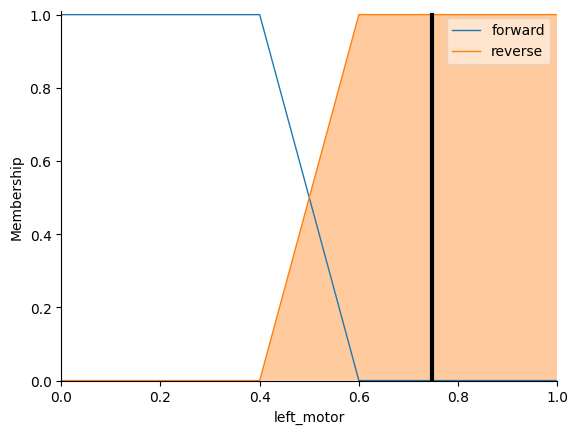

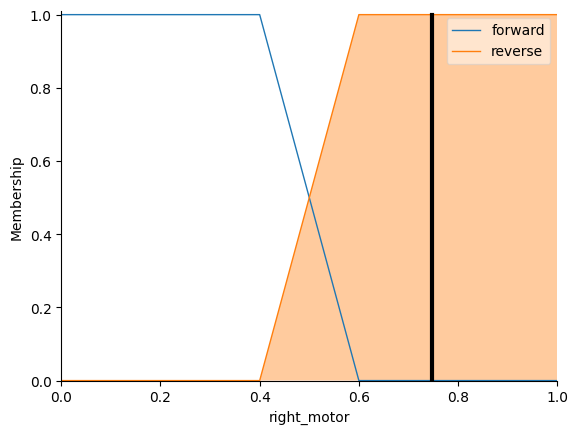

In [230]:
print(navigation.output['left_motor'])
print(navigation.output['right_motor'])
left_motor.view(sim=navigation);
right_motor.view(sim=navigation);

### Repositorio de Github

https://github.com/iMega34/FuzzyControlClass